# **Projeto: Análise de Vendas**

**1. Importando bibliotecas**

In [87]:

import csv # Biblioteca que pertmite criar e escrever arquivos CSV
import random # Biblioteca é usada para gerar valores aleatórios, como números e escolhas aleatórias de listas
from datetime import datetime, timedelta # Biblioteteca datetime, para manipular datas e calcular dias ou formatar datas de forma específica


**2. Definindo o nome do arquivo**

In [88]:
nome_arquivo = 'vendas.csv' # Nomeando o arquivo que será gerado, vendas.csv. Esse nome será usado posteriormente quando o arquvio for criado.

**3. Criando listas de Produtos e Regiões**

In [89]:
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D'] # Lista de produtos vendidos
regioes = ['Norte', 'Sul', 'Leste', 'Oeste'] # Lista de regiões onde as vendas pode ocorrer

**4. Definindo a data inicial**

In [90]:
data_inicial = datetime(2024, 1, 1) # Estabelecendo a data inicial dos registros de vendas

**5. Criando o arquivo CSV e escrevendo os dados**

In [116]:
with open('vendas.csv', mode='w', newline='', encoding='utf-8-sig') as arquivo_csv: # Criação arquivo, newline='': Garante que não haverá linhas extras entre os registros, encoding='utf-8': Define o formato de codificação para evitar problemas com caracteres especiais.
    escritor = csv.writer(arquivo_csv) #
    escritor.writerow(['data_venda', 'produto', 'quantidade', 'preco_unitario', 'preco_total', 'regiao']) # Escrevendo o cabeçalho

    for i in range(4000):  # Um laço que será executado 4.000 vezes

        # Gerar uma data aleatória no intervalo de 0 a 364 dias a partir da data inicial
        data_venda = data_inicial + timedelta(days=random.randint(0, 364))

        # Escolher um produto aleatoriamente da lista
        produto = random.choice(produtos)

        # Gerar um número aleatório entre 1 e 20 para a quantidade de itens vendidos
        quantidade = random.randint(1, 20)

        # Calcular o preço _unitario
        preco_unitario = round(random.uniform(10.0, 100.0), 2)

        # Calcular o preço total baseado na quantidade e no preço unitário (aleatório entre 10.0 e 100.0)
        preco_total = round(quantidade * preco_unitario, 2)

        # Escolher aleatoriamente uma região da lista de regiões
        regiao = random.choice(regioes)

        # Escrever a linha gerada no arquivo CSV
        escritor.writerow([
            data_venda.strftime('%d-%m-%Y'),  # Formatar a data no estilo DD-MM-YYYY
            produto,
            quantidade,
            preco_unitario,
            preco_total,
            regiao
        ])

print(f"Arquivo '{nome_arquivo}' criado com sucesso!")


# csv.writer(): Cria um "escritor" que será usado para adicionar dados ao arquivo.

Arquivo 'vendas.csv' criado com sucesso!


**6. Criando um DataFrame com a Biblioteca Pandas e Realizando Análise e Manipulação dos Dados**

In [117]:
import pandas as pd

df = pd.read_csv('vendas.csv')

df.head() # Exibi as primeiras linhas para verificar os dados

,data_venda,produto,quantidade,preco_unitario,preco_total,regiao
0,23-02-2024,Produto A,20,45.69,913.80,Oeste
1,27-10-2024,Produto C,16,79.84,1277.44,Leste
2,04-05-2024,Produto B,7,98.66,690.62,Norte
3,19-01-2024,Produto C,4,34.21,136.84,Sul
4,02-07-2024,Produto B,11,77.13,848.43,Sul


In [118]:
# Dimensões do DataFrame
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Linhas: 4000, Colunas: 6


In [119]:
# Verificar os tipos de dados
print(df.dtypes)

data_venda         object
produto            object
quantidade          int64
preco_unitario    float64
preco_total       float64
regiao             object
dtype: object


In [120]:
# Gerar estatísticas resumidas para colunas numéricas, como quantidade e preco_total
df.describe()

,quantidade,preco_unitario,preco_total
count,4000.000000,4000.000000,4000.000000
mean,10.523000,55.217478,581.726385
std,5.720153,25.999306,442.926265
min,1.000000,10.080000,10.080000
25%,6.000000,32.970000,218.870000
50%,10.000000,55.025000,467.775000
75%,15.000000,78.230000,851.445000
max,20.000000,99.990000,1989.400000


In [121]:
# Verificar se há valores nulos
df.isnull().sum()

,0
data_venda,0
produto,0
quantidade,0
preco_unitario,0
preco_total,0
regiao,0


**8. Análise Gráfica dos Dados**

In [168]:
# Frequência de vendas por produto e por Região
frequencia_produto = df['produto'].value_counts()
print(frequencia_produto)

produto
Produto A    1017
Produto C    1012
Produto D    1004
Produto B     967
Name: count, dtype: int64


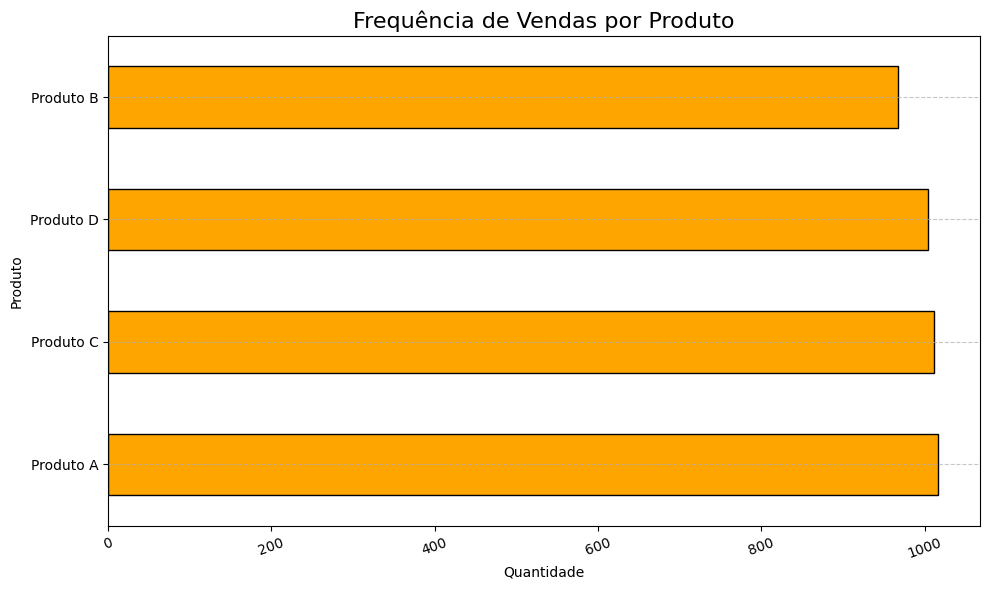

In [179]:
plt.figure(figsize=(10, 6))
frequencia_produto.plot(kind='barh', color='orange', edgecolor='black')

# Adicionar título e rótulos
plt.title('Frequência de Vendas por Produto', fontsize=16)
plt.xlabel('Quantidade', fontsize=10)
plt.ylabel('Produto', fontsize=10)
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()

*Análise: Observa-se que o Produto A possui a maior frequência de vendas enquanto o produto B a menor quantidade de vendas.*

***Convertendo a coluna data_venda para o tipo datetime para explorar e analisar dados temporais de forma eficiente e precisa. Isso é  útil em tarefas como análise de tendências, agrupamento por períodos e cálculos com datas***

In [124]:
# Converter a coluna data_venda para o tipo datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])

# Criar uma coluna com o nome do mês
df['Mês'] = df['data_venda'].dt.month_name()

# Quantidade de vendas por mês
vendas_por_mes = df.groupby('Mês')['preco_total'].sum().sort_values(ascending=False)

print(vendas_por_mes)

Mês
August       207973.60
July         203611.35
April        203265.67
March        199866.24
May          199592.67
December     198109.30
February     197350.07
October      188450.50
September    187500.20
January      186558.29
June         178704.52
November     175923.13
Name: preco_total, dtype: float64


<ipython-input-124-ac52c80e201d>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_venda'] = pd.to_datetime(df['data_venda'])


In [152]:
# Quantidade de vendas por região
vendas_por_regiao = df.groupby('regiao')['quantidade'].sum().sort_values(ascending=False)

print(vendas_por_regiao)

regiao
Sul      11441
Oeste    10699
Norte    10258
Leste     9694
Name: quantidade, dtype: int64


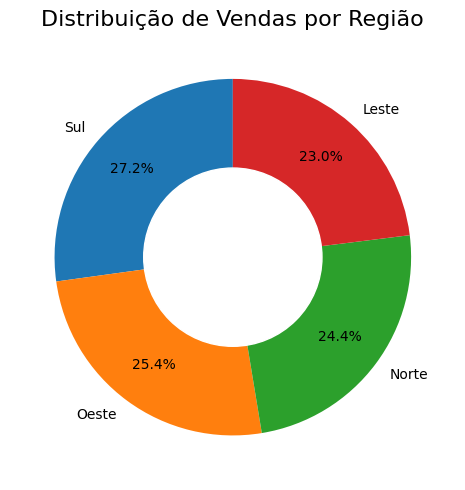

In [160]:
# Criar os rótulos e os valores
regioes_ = vendas_por_regiao.index
quantidades_ = vendas_por_regiao.values

# Criar o gráfico de rosca
plt.figure(figsize=(5, 5))
plt.pie(
    quantidades_,
    labels=regioes_,
    autopct='%1.1f%%',  # Mostrar porcentagens com uma casa decimal
    startangle=90,      # Começar o gráfico no ângulo de 90°
    pctdistance=0.75    # Controlar onde aparecem as porcentagens
)

# Criar o círculo branco no centro (transformando o gráfico de pizza em rosca)
circulo_central = plt.Circle((0, 0), 0.50, color='white')
plt.gca().add_artist(circulo_central)

# Adicionar título
plt.title('Distribuição de Vendas por Região', fontsize=16)

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()



*Análise: Observa-se que a região Sul possui o maior volume de vendas e a região Leste a menor.*

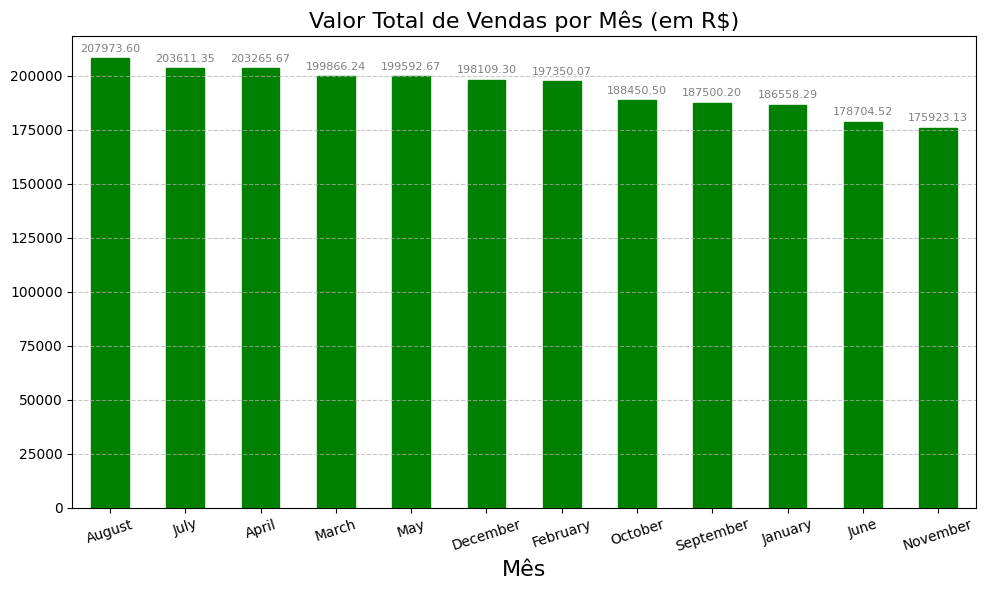

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar o gráfico de barras para o valor total de vendas por mês
plt.figure(figsize=(10, 6))
barras = vendas_por_mes.plot(kind='bar', color='green', edgecolor='green')

# Adicionar rótulos de valores em cada barra
for barra in barras.containers:
    # Adicionar os valores no topo de cada barra
    barras.bar_label(barra, fmt='%.2f', padding=3, fontsize=8, color='gray')

# Adicionar título e rótulos dos eixos
plt.title('Valor Total de Vendas por Mês (em R$)', fontsize=16)
plt.xlabel('Mês', fontsize=16)
plt.xticks(rotation=18, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()
